[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.10_custom_train.ipynb)

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()


In [2]:
import numpy as np
import tensorflow as tf

# 파일 경로 설정 (환경에 맞게 수정하세요)
mnist_path = '../dataset/mnist/mnist.npz'  # 윈도우 예시
#mnist_path = 'D:/datasets/mnist.npz'  # 윈도우 예시
# mnist_path = '/home/user/datasets/mnist.npz'  # 리눅스 예시

# npz 파일 직접 로드
with np.load(mnist_path) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# 데이터 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

print("x_train[0, 10:15, 10:15] = " + repr(x_train[0, 10:15, 10:15]))
print("x_test[0, 10:15, 10:15] = " + repr(x_test[0, 10:15, 10:15]))

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)
x_train[0, 10:15, 10:15] = array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])
x_test[0, 10:15, 10:15] = array([[0.        , 0.06666667, 0.25882353, 0.05490196, 0.2627451 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])


## 8-3-1. train_on_batch

In [3]:
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), 
])

# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
# 배치 생성 함수
def get_batches(x, y, batch_size=32):
    for i in range(int(x.shape[0] // batch_size)):
        x_batch = x[i * batch_size: (i + 1) * batch_size]
        y_batch = y[i * batch_size: (i + 1) * batch_size]
        yield (np.asarray(x_batch), np.asarray(y_batch))

In [5]:
# 1개의 배치 로드
x, y = next(get_batches(x_train, y_train))
x.shape, y.shape

((32, 28, 28), (32,))

epoch:1, batch:50, batch_loss: 0.4736,                    batch_accuracy: 0.8594, avg_loss: 0.9940
epoch:1, batch:100, batch_loss: 0.4422,                    batch_accuracy: 0.8984, avg_loss: 0.6941
epoch:1, batch:150, batch_loss: 0.2900,                    batch_accuracy: 0.9297, avg_loss: 0.5715
epoch:1, batch:200, batch_loss: 0.2754,                    batch_accuracy: 0.9297, avg_loss: 0.4910
epoch:1, batch:250, batch_loss: 0.1912,                    batch_accuracy: 0.9375, avg_loss: 0.4412
epoch:1, batch:300, batch_loss: 0.2620,                    batch_accuracy: 0.9062, avg_loss: 0.4031
epoch:1, batch:350, batch_loss: 0.1395,                    batch_accuracy: 0.9531, avg_loss: 0.3746
epoch:1, batch:400, batch_loss: 0.0948,                    batch_accuracy: 0.9766, avg_loss: 0.3543
epoch:1, batch:450, batch_loss: 0.1020,                    batch_accuracy: 0.9688, avg_loss: 0.3325


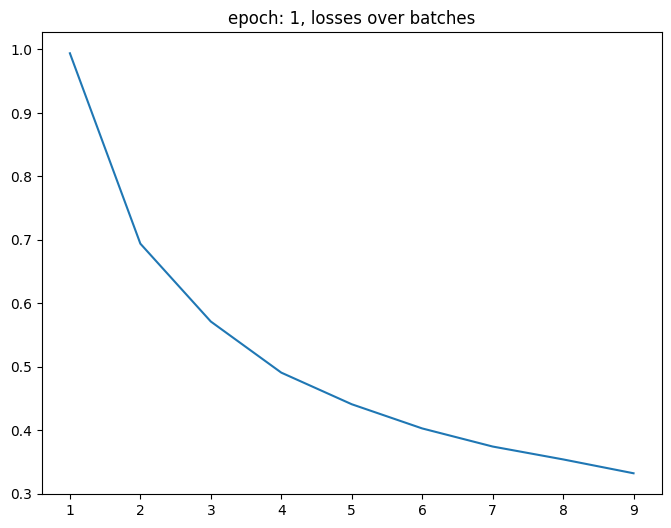

313/313 [==============================] - 0s 875us/step - loss: 0.1547 - accuracy: 0.9492
------------------------------
epoch:1, val_loss: 0.1547, val_accuracy: 0.949200

epoch:2, batch:50, batch_loss: 0.0626,                    batch_accuracy: 0.9766, avg_loss: 0.1299
epoch:2, batch:100, batch_loss: 0.2198,                    batch_accuracy: 0.9453, avg_loss: 0.1488
epoch:2, batch:150, batch_loss: 0.1538,                    batch_accuracy: 0.9375, avg_loss: 0.1440
epoch:2, batch:200, batch_loss: 0.1740,                    batch_accuracy: 0.9531, avg_loss: 0.1382
epoch:2, batch:250, batch_loss: 0.0900,                    batch_accuracy: 0.9766, avg_loss: 0.1367
epoch:2, batch:300, batch_loss: 0.1920,                    batch_accuracy: 0.9531, avg_loss: 0.1336
epoch:2, batch:350, batch_loss: 0.0582,                    batch_accuracy: 0.9766, avg_loss: 0.1307
epoch:2, batch:400, batch_loss: 0.0699,                    batch_accuracy: 0.9844, avg_loss: 0.1300
epoch:2, batch:450, batch_lo

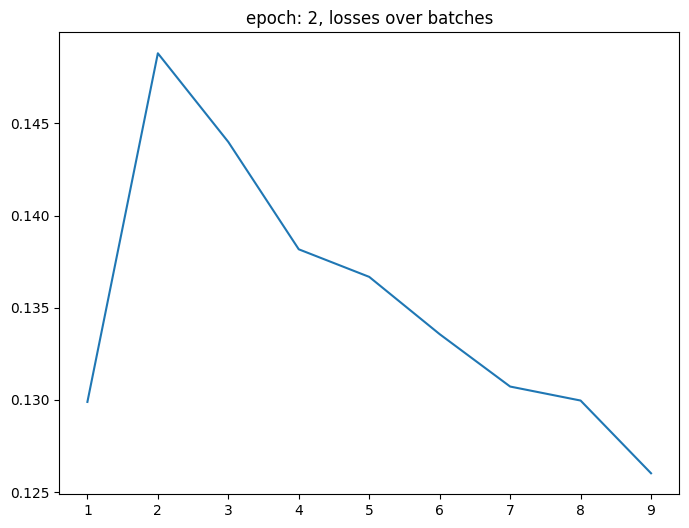

313/313 [==============================] - 0s 927us/step - loss: 0.1182 - accuracy: 0.9620
------------------------------
epoch:2, val_loss: 0.1182, val_accuracy: 0.962000

epoch:3, batch:50, batch_loss: 0.0322,                    batch_accuracy: 0.9922, avg_loss: 0.0826
epoch:3, batch:100, batch_loss: 0.1477,                    batch_accuracy: 0.9766, avg_loss: 0.0916
epoch:3, batch:150, batch_loss: 0.1259,                    batch_accuracy: 0.9609, avg_loss: 0.0885
epoch:3, batch:200, batch_loss: 0.1355,                    batch_accuracy: 0.9766, avg_loss: 0.0862
epoch:3, batch:250, batch_loss: 0.0566,                    batch_accuracy: 0.9688, avg_loss: 0.0864
epoch:3, batch:300, batch_loss: 0.1282,                    batch_accuracy: 0.9688, avg_loss: 0.0858
epoch:3, batch:350, batch_loss: 0.0287,                    batch_accuracy: 1.0000, avg_loss: 0.0845
epoch:3, batch:400, batch_loss: 0.0521,                    batch_accuracy: 0.9844, avg_loss: 0.0838
epoch:3, batch:450, batch_lo

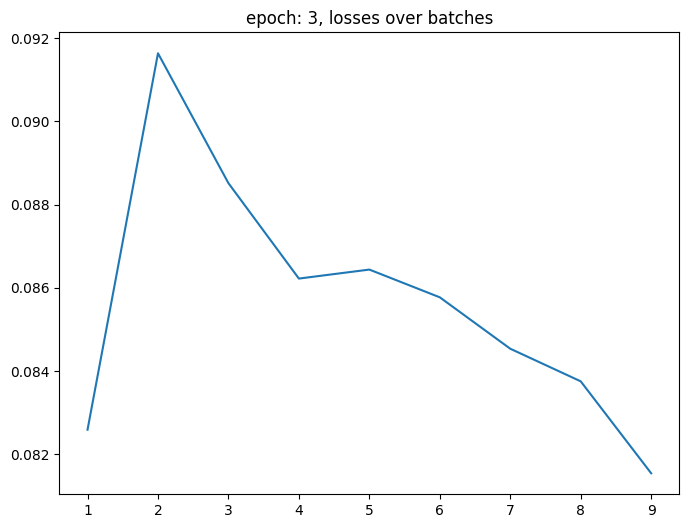

313/313 [==============================] - 0s 870us/step - loss: 0.1203 - accuracy: 0.9618
------------------------------
epoch:3, val_loss: 0.1203, val_accuracy: 0.961800



In [6]:
import matplotlib.pyplot as plt

MONITOR_STEP = 50

for epoch in range(1, 4):
    batch = 1
    total_loss = 0
    losses = []
    for x, y in get_batches(x_train, y_train, batch_size=128):
        # 배치별 훈련
        loss, acc = model.train_on_batch(x, y)
        total_loss += loss

        # 출력
        if batch % MONITOR_STEP == 0:    
            losses.append(total_loss / batch)
            print(f'epoch:{epoch}, batch:{batch}, batch_loss: {loss:.4f},\
                    batch_accuracy: {acc:.4f}, avg_loss: {total_loss / batch:.4f}')
        batch += 1
    
    # Loss 시각화
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, batch // MONITOR_STEP+1), losses)
    plt.title(f'epoch: {epoch}, losses over batches')
    plt.show()
    
    # 결과 출력
    loss, acc = model.evaluate(x_test, y_test)
    print('---'*10)
    print(f'epoch:{epoch}, val_loss: {loss:.4f}, val_accuracy: {acc:4f}')
    print()